# **MLP for Regression**

In [16]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# The House Prices Dataset
housing = fetch_california_housing()
print("Examples = ",housing.data.shape ," Labels = ", housing.target.shape)
X = housing.data
Y = housing.target

print("-----------------------------------------------------------------------")
print("Example 0 : \n",housing.data[0],"\nLabel 0 : \n",housing.target[0])

print("-----------------------------------------------------------------------")
# Dataset to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["price"] = pd.Series(housing.target)
print("Info : \n",df.info())


Examples =  (20640, 8)  Labels =  (20640,)
-----------------------------------------------------------------------
Example 0 : 
 [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] 
Label 0 : 
 4.526
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Info : 
 None


In [2]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

number of duplicate rows :  (0, 9)


SUM : 
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


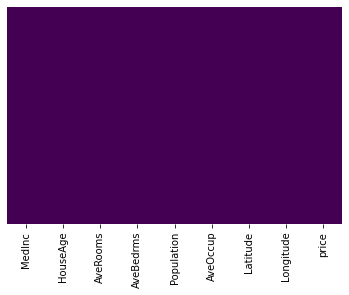

In [3]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# df["col"] = df["col"].fillna(df["col"].mean())
# df["col"] = df["col"].fillna(df["col"].interpolate())

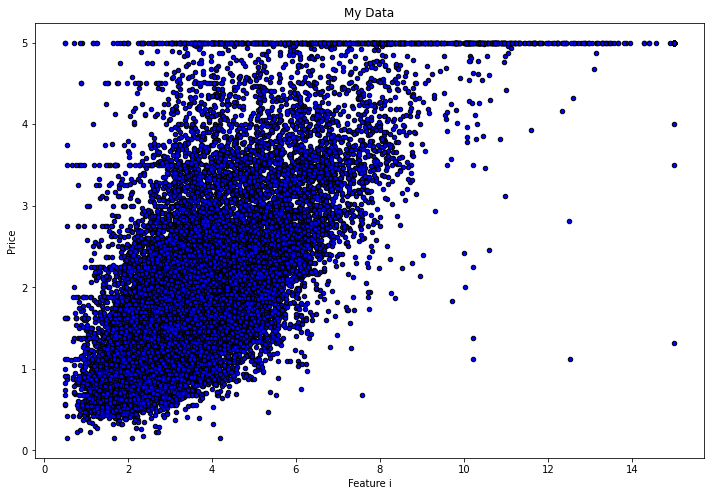

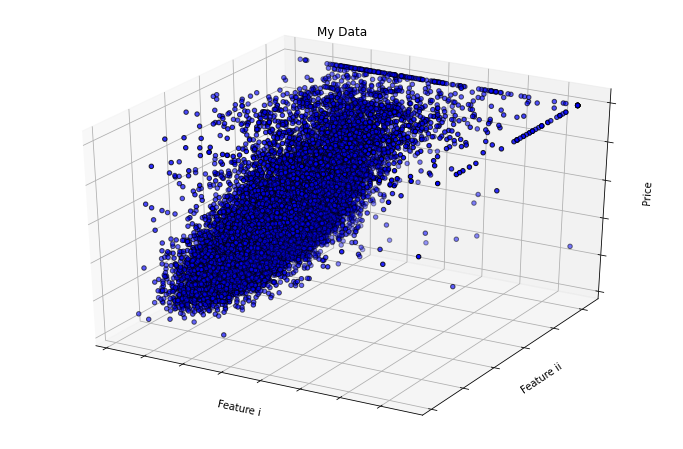

In [22]:
# 2D
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], Y, c="b", marker="o", cmap=plt.cm.Set1, edgecolor="k", s=20)
ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.set_ylabel("Price")
plt.show()

print("\n")
# 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y, c="b", marker="o", cmap=plt.cm.Set1, edgecolor="k", s=20)
ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature ii")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Price")
ax.w_zaxis.set_ticklabels([])
plt.show()


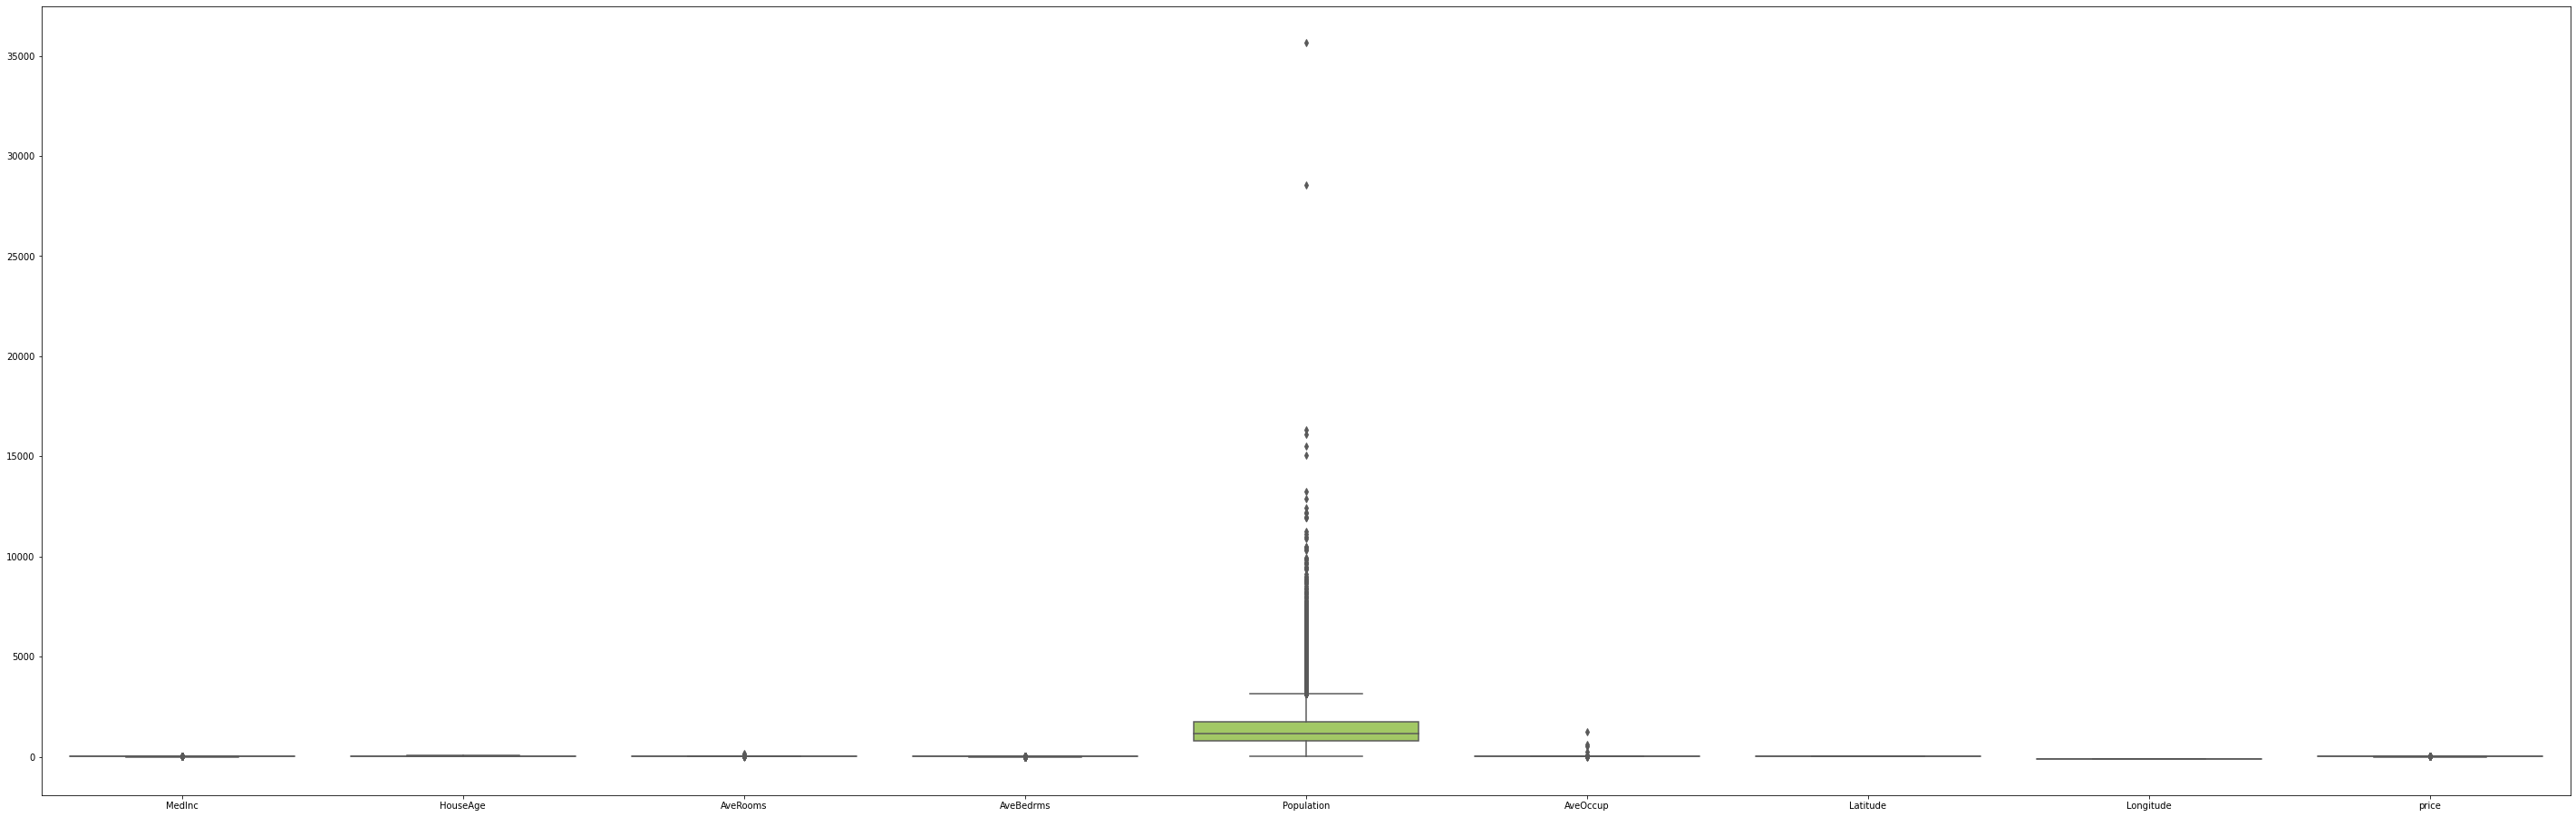

In [5]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()

In [7]:
# Remove Outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")

indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) 
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-----------------------------")


[dtype('float64')]
Numerical Data : 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'price']


0
Q1 =  2.5633999999999997  Q3 =  4.74325  IQR =  2.17985
-----------------------------
1
Q1 =  18.0  Q3 =  37.0  IQR =  19.0
-----------------------------
2
Q1 =  4.440716235896959  Q3 =  6.052380952380952  IQR =  1.6116647164839932
-----------------------------
3
Q1 =  1.006079046038478  Q3 =  1.099526066350711  IQR =  0.09344702031223284
-----------------------------
4
Q1 =  787.0  Q3 =  1725.0  IQR =  938.0
-----------------------------
5
Q1 =  2.4297411475535755  Q3 =  3.2822609242736216  IQR =  0.8525197767200461
-----------------------------
6
Q1 =  33.93  Q3 =  37.71  IQR =  3.780000000000001
-----------------------------
7
Q1 =  -121.8  Q3 =  -118.01  IQR =  3.789999999999992
-----------------------------
8
Q1 =  1.196  Q3 =  2.6472499999999997  IQR =  1.4512499999999997
-----------------------------


<function matplotlib.pyplot.show>

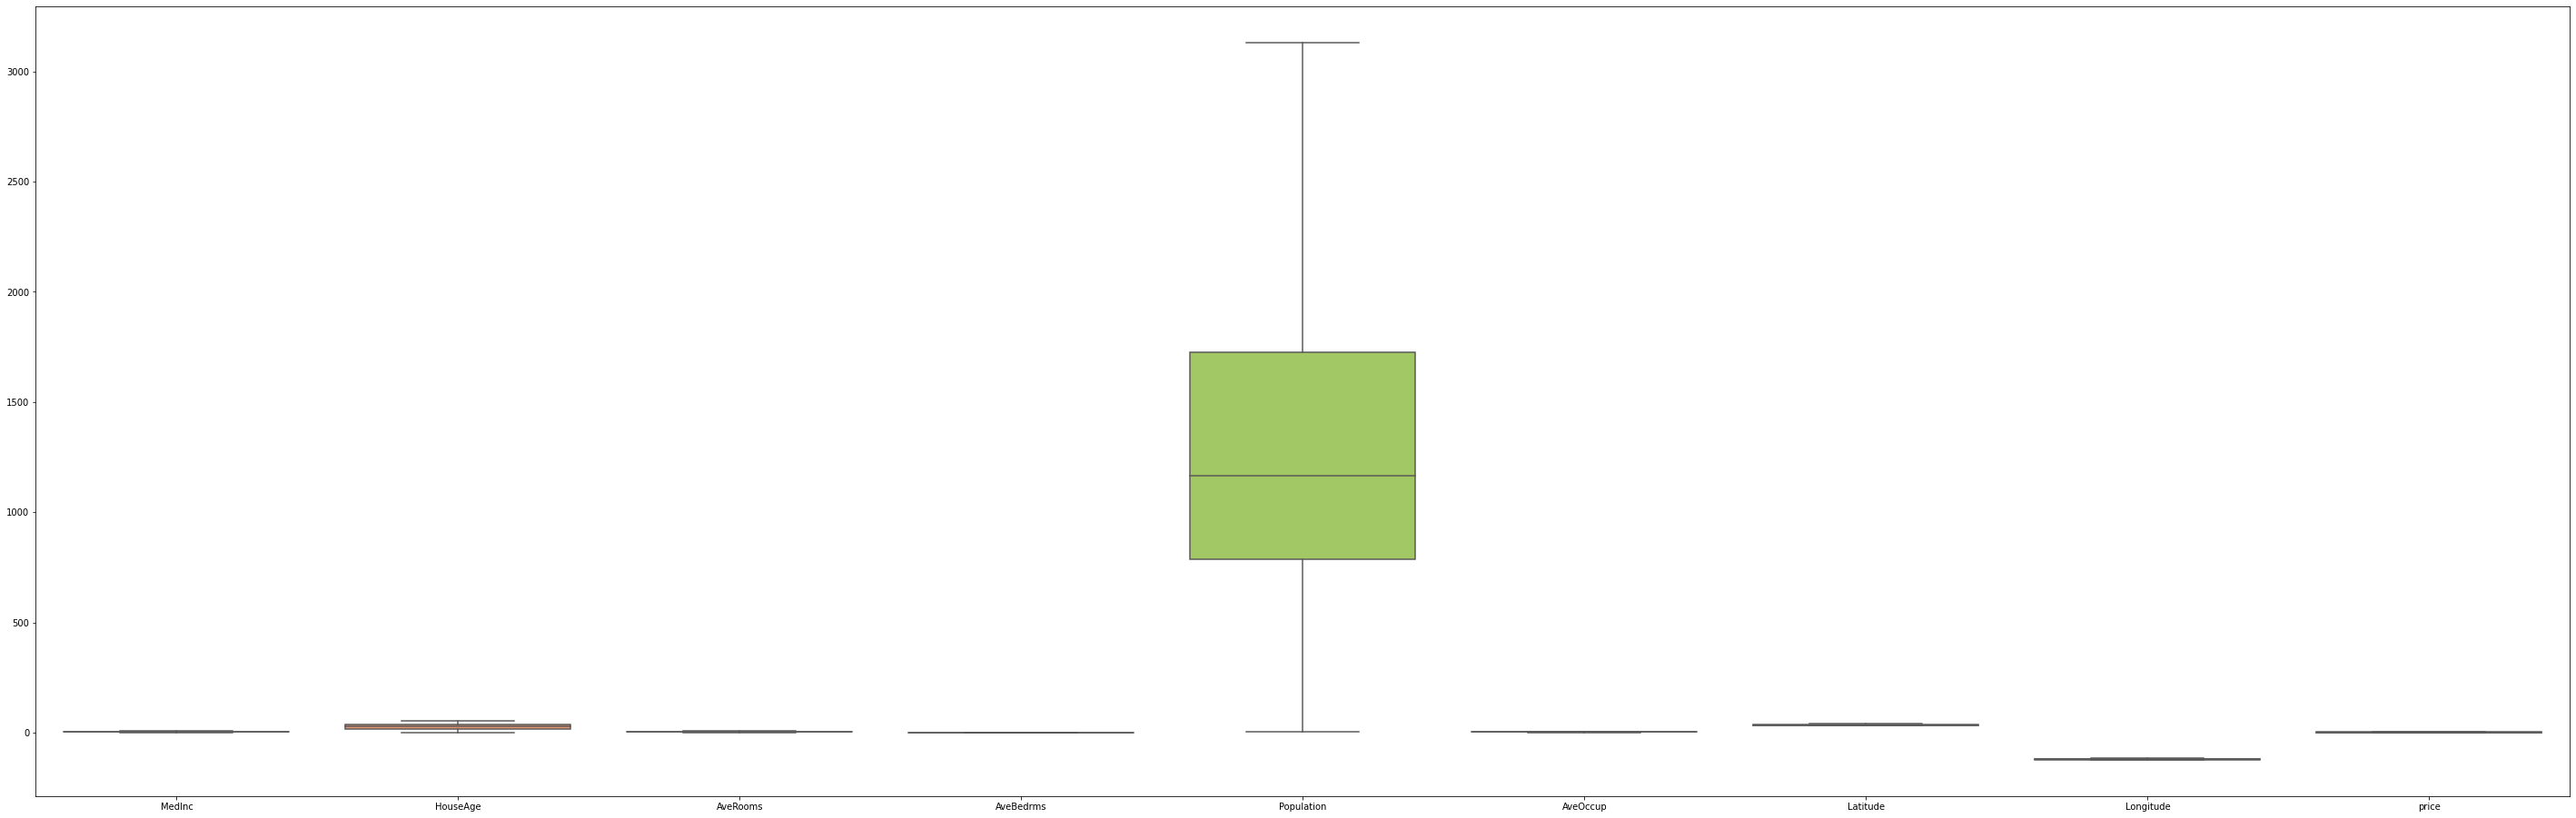

In [8]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


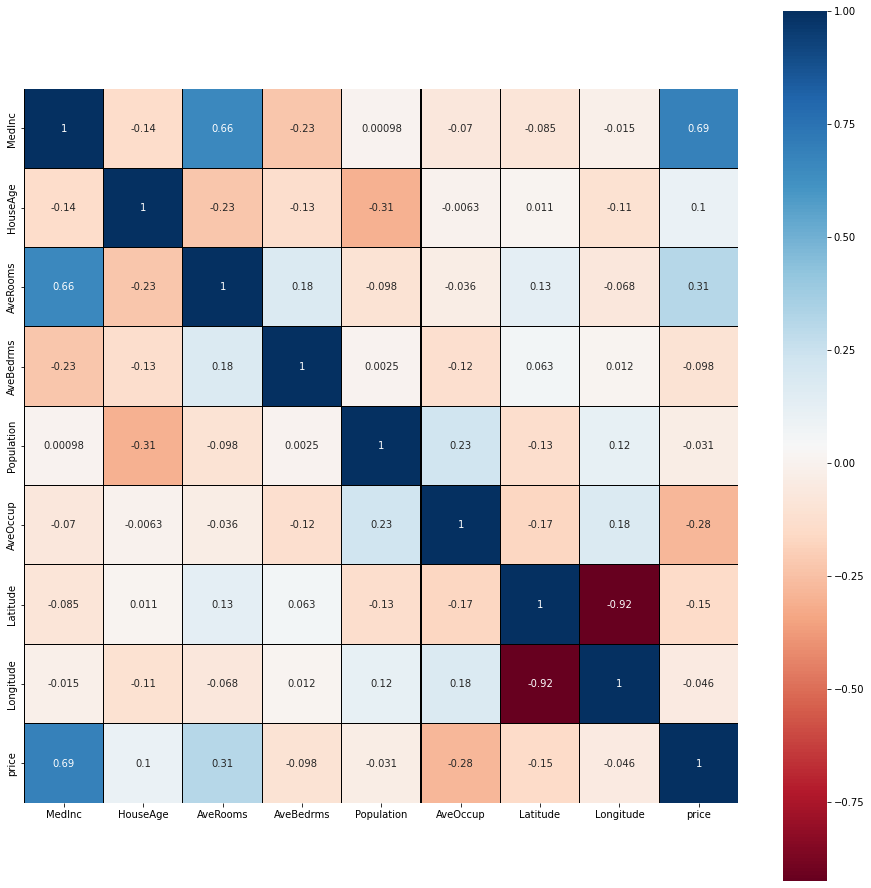

In [9]:
# heatmap
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(16,16)) 
# sns.heatmap(corrMatrix, annot=True)
sns.heatmap(corrMatrix, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


In [10]:
# Correlation with output variable
cor_target = abs(corrMatrix["price"])

# Selecting highly correlated features : 0.1
relevant_features = cor_target[cor_target>= 0.1]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_relevant_features_columns = relevant_features.index.to_list()

my_data = pd.DataFrame(df, columns= lst_relevant_features_columns)
print (my_data.sample(10))

print("-----------------------------------------------------------------------")
print("List the column names : \n",my_data.columns.to_list())


relevant_features :  (6,) 
 MedInc      0.689654
HouseAge    0.104423
AveRooms    0.309365
AveOccup    0.281963
Latitude    0.145494
price       1.000000
Name: price, dtype: float64
-----------------------------------------------------------------------
         MedInc  HouseAge  AveRooms  AveOccup  Latitude  price
9358   5.697000      38.0  5.984456  2.515544     37.95  4.357
3485   8.013025      16.0  7.399167  2.890000     34.28  4.286
3963   3.181800      18.0  4.212478  2.732195     34.20  2.080
9668   1.581700      20.0  7.190476  2.498168     38.53  0.978
13884  2.859400      14.0  7.672881  2.779661     34.89  0.817
210    3.515600      44.0  5.466912  3.533088     37.79  1.095
2824   2.681200      19.0  5.320109  2.560876     35.42  1.076
10825  3.184000      20.0  3.863889  2.377778     33.65  2.200
9871   3.801500      24.0  5.488739  3.220721     36.61  1.691
19529  7.384100      40.0  6.698413  2.507937     37.65  1.722
-----------------------------------------------------

In [11]:
X_data = my_data.drop(["price"], axis=1).values
y_data = my_data["price"].values
print("X_data : ",X_data.shape," y_data : ",y_data.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_sts = scaler.transform(X_data)

# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_sts, 
              y_data, test_size= 0.20, random_state=100)
# Val set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full
                                                      , test_size= 0.10)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)


X_data :  (20640, 5)  y_data :  (20640,)
X_train  =  (14860, 5)  y_train =  (14860,)
X_test   =  (4128, 5)  y_test =  (4128,)
X_valid  =  (1652, 5)  y_valid =  (1652,)


In [12]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu")) # price > 0, so, relu

"""
model = keras.models.Sequential([
keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(8, activation="relu"),
keras.layers.Dense(1)
])
"""

"""
def my_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(64, activation="relu", input_shape = X_train.shape[1:]))
  model.add(keras.layers.Dense(16, activation="relu"))
  model.add(keras.layers.Dense(8, activation="relu"))
  model.add(keras.layers.Dense(1))

  return model
"""

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Fetch a layer by its index
hidden = model.layers[0]
print("Layer name : ", hidden.name)

# Parameters of a layer
# The Dense layer initialized the connection weights randomly 
# The biases were initialized to zeros
# If you ever want to use a different initialization method, you can set kernel_initializer
# https://keras.io/initializers/
weights, biases = hidden.get_weights()
print("weights shape = ",weights.shape)
# print(weights)
print("biases shape = ",biases.shape)
# print(biases)


Layer name :  dense
weights shape =  (5, 64)
biases shape =  (64,)


In [14]:
# Compiling the model
# https://keras.io/models/sequential/
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mse"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))
# history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/100
117/117 [==============================] - 4s 6ms/step - loss: 0.9447 - mse: 0.9447 - val_loss: 0.5030 - val_mse: 0.5030
Epoch 2/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.4677 - val_mse: 0.4677
Epoch 3/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.4650 - val_mse: 0.4650
Epoch 4/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4395 - mse: 0.4395 - val_loss: 0.4546 - val_mse: 0.4546
Epoch 5/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4345 - mse: 0.4345 - val_loss: 0.4813 - val_mse: 0.4813
Epoch 6/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.4503 - val_mse: 0.4503
Epoch 7/100
117/117 [==============================] - 0s 4ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.4497 - val_mse: 0.4497
Epoch 8/100
117/117 [==============================] - 0s 4ms/step - 

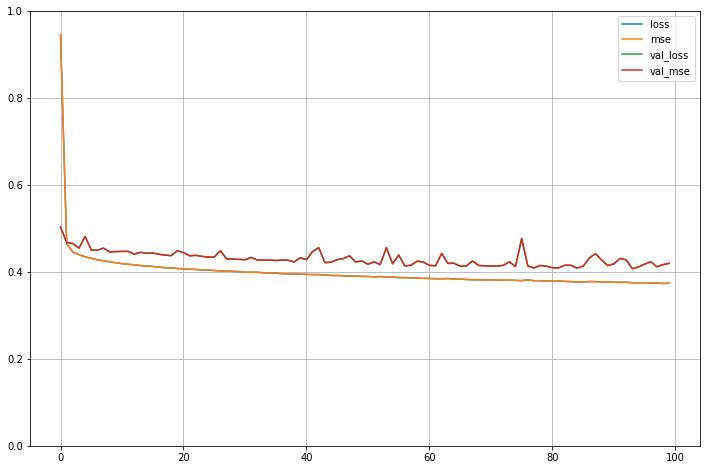

-----------------------------------------------------------------------
129/129 [==============================] - 1s 3ms/step - loss: 0.3720 - mse: 0.3720
Loss                   :  0.3720094859600067
Mean Squared Error     :  0.3720094859600067


In [15]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Squared Error     : ",model_evaluate[1])


Mean Absolute Error    :  0.428217129985578
Mean Squared Error     :  0.3720094802938893
Root Mean Squared Error:  0.6099257990066409
r2_score               :  0.7124535762693676
-----------------------------------------------------------------------
      Actual  Predicted
0   2.453000   2.154406
1   1.042000   0.815905
2   1.462000   1.953348
3   1.542000   0.974168
4   3.242000   1.749190
5   1.411000   1.392419
6   2.273000   2.282309
7   2.023000   2.387113
8   1.702000   0.919792
9   3.018000   2.378617
10  1.522000   1.919203
11  3.081000   2.830274
12  4.824125   4.267107
13  1.625000   2.536553
14  2.250000   3.134228
-----------------------------------------------------------------------


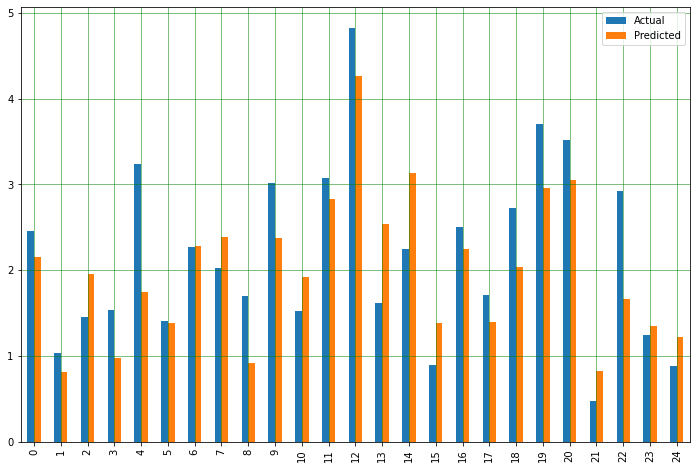

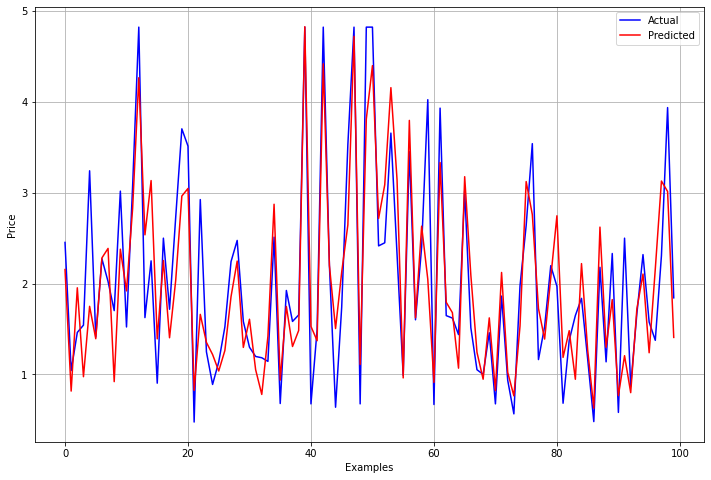

In [23]:
# Comparison of the actual results with the predicted results
predicted = model.predict(X_test)

# Model evaluation
print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))  
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))  
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score               : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
print(df_data.head(15))
print("-----------------------------------------------------------------------")

df_data = df_data.head(25)
df_data.plot(kind="bar",figsize=(12,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

# Plot y_test and predicted
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(y_test[:100],    color="b", label="Actual")
ax.plot(predicted[:100], color="r", label="Predicted")
ax.set_xlabel("Examples")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.show()

# Make predictions
# predicted = model.predict(X_new)


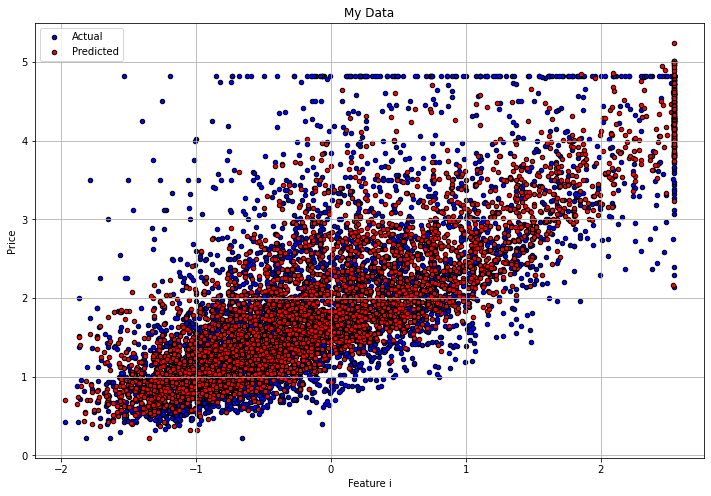

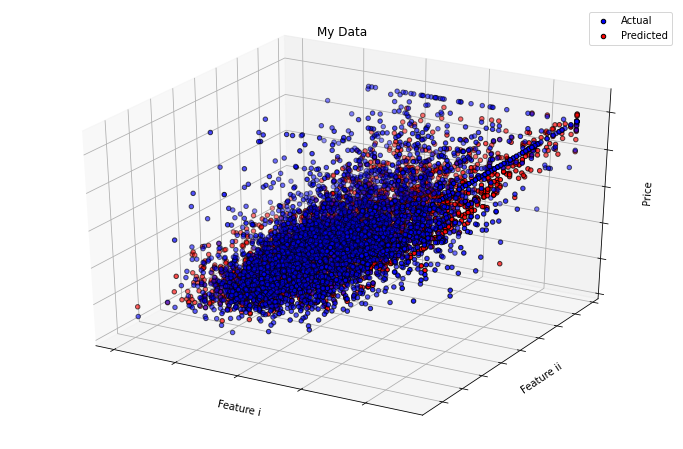

In [21]:
# Plot the test dataset
# 2D
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test[:, 0], y_test, c="b", marker="o",cmap=plt.cm.Set1, 
                                           edgecolor="k", s=20, label="Actual")
ax.scatter(X_test[:, 0], predicted, c="r", marker="o",cmap=plt.cm.Set1, 
                                         edgecolor="k", s=20, label="Predicted")

ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.show()

print("\n")
# 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c="b", marker="o",cmap=plt.cm.Set1, 
           edgecolor="k", s=20, label="Actual")
ax.scatter(X_test[:, 0], X_test[:, 1], predicted, c="r", marker="o",cmap=plt.cm.Set1, 
           edgecolor="k", s=20, label="Predicted")
ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature ii")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Price")
ax.w_zaxis.set_ticklabels([])
ax.legend()
ax.grid(True)
plt.show()


## **Calculation of Bias and Variance**

In [24]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [25]:
# Calculation of Bias and Variance
# http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#api
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train, 
        X_test, y_test, 
        loss="mse", # Loss function for performing the bias-variance decomposition. Currently allowed values are '0-1_loss' and 'mse'.
        num_rounds=3, # Number of bootstrap rounds for performing the bias-variance decomposition.
        random_seed=100,
        epochs=10, # fit_param
        verbose=1) 

print("-----------------------------------------------------------------------")
print("Average expected loss: %.3f" % avg_expected_loss)
print("Average bias         : %.3f" % avg_bias)
print("Average variance     : %.3f" % avg_var)


Epoch 1/10
465/465 [==============================] - 3s 7ms/step - loss: 0.6447 - mse: 0.6447
Epoch 2/10
465/465 [==============================] - 3s 7ms/step - loss: 0.4294 - mse: 0.4294
Epoch 3/10
465/465 [==============================] - 4s 8ms/step - loss: 0.4170 - mse: 0.4170
Epoch 4/10
465/465 [==============================] - 4s 8ms/step - loss: 0.4111 - mse: 0.4111
Epoch 5/10
465/465 [==============================] - 4s 8ms/step - loss: 0.4061 - mse: 0.4061
Epoch 6/10
465/465 [==============================] - 3s 7ms/step - loss: 0.4035 - mse: 0.4035
Epoch 7/10
465/465 [==============================] - 4s 8ms/step - loss: 0.3998 - mse: 0.3998
Epoch 8/10
465/465 [==============================] - 4s 8ms/step - loss: 0.3977 - mse: 0.3977
Epoch 9/10
465/465 [==============================] - 3s 7ms/step - loss: 0.3948 - mse: 0.3948
Epoch 10/10
465/465 [==============================] - 3s 7ms/step - loss: 0.3935 - mse: 0.3935
Epoch 1/10
465/465 [=============================

# **MLP for Classification** 

11501568/11490434 [==============================] - 0s 0us/step
X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


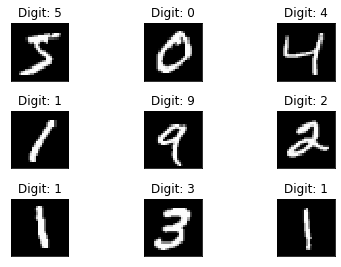

In [26]:
# Building an Image Classifier Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap="gray", interpolation="none")
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0


In [27]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
               metrics=["accuracy", tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.9108 - accuracy: 0.7616 - sparse_top_k_categorical_accuracy: 0.9567 - val_loss: 0.3860 - val_accuracy: 0.8932 - val_sparse_top_k_categorical_accuracy: 0.9909
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3511 - accuracy: 0.9009 - sparse_top_k_categorical_accuracy: 0.9931 - val_loss: 0.2921 - val_accuracy: 0.9158 - val_sparse_top_k_categorical_accuracy: 0.9937
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2841 - accuracy: 0.9182 - sparse_top_k_categorical_accuracy: 0.9951 - val_loss: 0.2487 - val_accuracy: 0.9283 - val_sparse_top_k_categorical_accuracy: 0.9952
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2471 - accuracy: 0.9280 - sparse_top_k_categorical_accuracy: 0.9961 - val_loss: 0.2269 - val_accuracy: 0.9370 - val_sparse_top_k_categorical_accuracy: 0.9956
Epoch 5/20
750/750 [==============================] - 3s 4ms/ste

In [ ]:
"""
Sometimes there is no good loss/metrics available or you need to implement 
some modifications.

A custom loss/metrics function can be created by defining a function that takes
the true values and predicted values as required parameters.
The function canthen be passed at the compile stage.
"""

"""
# Define custom loss
def custom_loss(y_true, y_pred):
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  return loss(y_true, y_pred)

# Calculate accuracy percentage between two lists
def accuracy_metric(y_true, y_pred):
  return keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# Compiling the model
model.compile(optimizer="sgd", loss=custom_loss, metrics=[accuracy_metric])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
"""

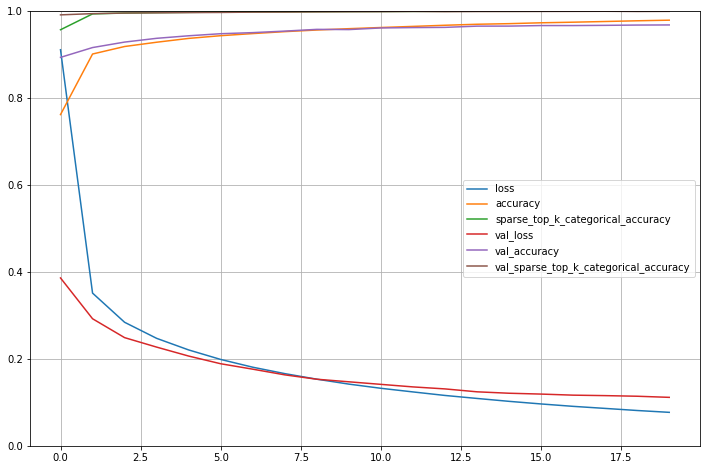

-----------------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9660 - sparse_top_k_categorical_accuracy: 0.9993
Loss                       :  0.10877656191587448
accuracy                   :  0.9660000205039978
Top 5 Categorical Accuracy :  0.9993000030517578


In [29]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                       : ",model_evaluate[0])
print("accuracy                   : ",model_evaluate[1])
print("Top 5 Categorical Accuracy : ",model_evaluate[2])


Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.96      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.94      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix : 



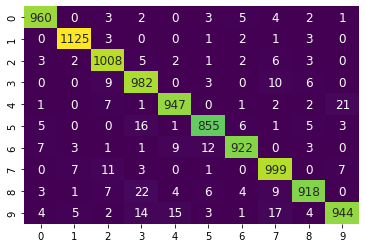

Normalized confusion matrix : 



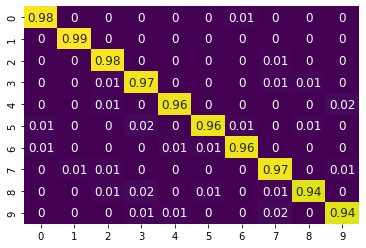

In [32]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")


In [ ]:
# Make predictions
# predicted = model.predict(X_new)

# Save and Load Your Model
model.save("/content/my_model.h5")

# Loading the model:
# my_model = keras.models.load_model("/content/my_model.h5")


# **Multi-Label Classification**

In [33]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
import tensorflow as tf
from tensorflow import keras
import numpy as np

# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, 
                                      n_classes=3, n_labels=2, random_state=1)

# summarize dataset shape
print(X.shape, y.shape)

print("-----------------------------------------------------------------------")
# summarize first few examples
for i in range(10):
	print("Exp ",i," : Features ",X[i], "  =>  Labels ", y[i])


(1000, 10) (1000, 3)
-----------------------------------------------------------------------
Exp  0  : Features  [ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.]   =>  Labels  [1 1 0]
Exp  1  : Features  [7. 6. 4. 4. 6. 8. 3. 4. 6. 4.]   =>  Labels  [0 0 0]
Exp  2  : Features  [ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.]   =>  Labels  [1 1 0]
Exp  3  : Features  [1. 1. 5. 5. 7. 3. 4. 6. 4. 4.]   =>  Labels  [1 1 1]
Exp  4  : Features  [ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.]   =>  Labels  [0 1 0]
Exp  5  : Features  [ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.]   =>  Labels  [0 0 0]
Exp  6  : Features  [ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.]   =>  Labels  [0 1 0]
Exp  7  : Features  [ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.]   =>  Labels  [1 1 1]
Exp  8  : Features  [ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.]   =>  Labels  [1 1 1]
Exp  9  : Features  [ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.]   =>  Labels  [1 1 1]


In [34]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X_train : ",X_train.shape," y_train : ",y_train.shape)
print("X_test  : ",X_test.shape," y_test : ",y_test.shape)


X_train :  (700, 10)  y_train :  (700, 3)
X_test  :  (300, 10)  y_test :  (300, 3)


In [35]:
n_outputs = 3

# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(n_outputs, activation="sigmoid"))

# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[keras.metrics.BinaryAccuracy()])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)


Epoch 1/200
9/9 [==============================] - 2s 55ms/step - loss: 0.9511 - binary_accuracy: 0.4405 - val_loss: 0.7444 - val_binary_accuracy: 0.5095
Epoch 2/200
9/9 [==============================] - 0s 15ms/step - loss: 0.7313 - binary_accuracy: 0.5036 - val_loss: 0.6827 - val_binary_accuracy: 0.5238
Epoch 3/200
9/9 [==============================] - 0s 17ms/step - loss: 0.6820 - binary_accuracy: 0.5464 - val_loss: 0.6510 - val_binary_accuracy: 0.5690
Epoch 4/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6512 - binary_accuracy: 0.5958 - val_loss: 0.6251 - val_binary_accuracy: 0.6262
Epoch 5/200
9/9 [==============================] - 0s 20ms/step - loss: 0.6252 - binary_accuracy: 0.6345 - val_loss: 0.6008 - val_binary_accuracy: 0.6690
Epoch 6/200
9/9 [==============================] - 0s 18ms/step - loss: 0.5997 - binary_accuracy: 0.6690 - val_loss: 0.5753 - val_binary_accuracy: 0.6976
Epoch 7/200
9/9 [==============================] - 0s 14ms/step - loss: 0.57

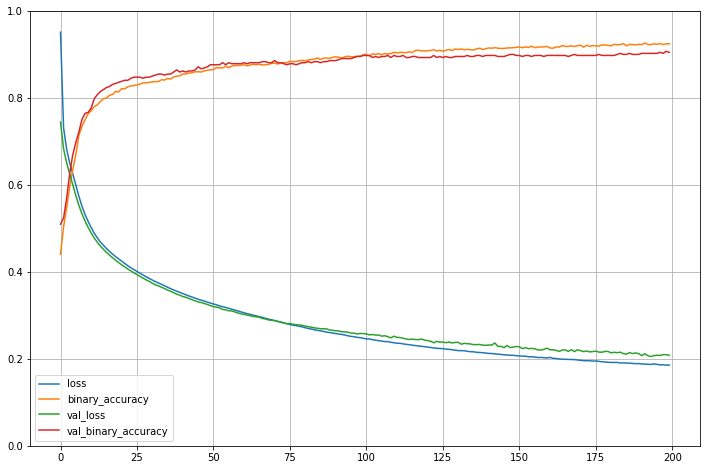

-----------------------------------------------------------------------
10/10 [==============================] - 0s 3ms/step - loss: 0.1965 - binary_accuracy: 0.9200
Loss     :  0.19654861092567444
accuracy :  0.919999897480011


In [36]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


In [37]:
"""
Hamming loss is equal to the number of incorrect prediction divided by the total number 
of predictions where the output of the model may contain one or more predictions.
"""
from sklearn.metrics import hamming_loss, accuracy_score

y_pred = model.predict(X_test)
# round probabilities to class labels
y_pred = y_pred.round()

print("Accuracy     : ",accuracy_score(y_test, y_pred))
print("Hamming loss : ",hamming_loss(y_test, y_pred))


Accuracy     :  0.8133333333333334
Hamming loss :  0.08


# **class_weight and sample_weight**

In [58]:
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("-----------------------------------------------------------------------")
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train)
print("class_weights : \n",class_weights)
class_weights = dict(enumerate(class_weights))
print("class_weights dict : \n",class_weights)

print("-----------------------------------------------------------------------")
sample_weight = np.ones(shape=(len(y_train[0:10]),))
print("sample_weight 0 : \n",sample_weight)

sample_weight[1] = 1.2
sample_weight[2] = 1.2
sample_weight[7] = 1.2

print("sample_weight 1 : \n",sample_weight)

print("-----------------------------------------------------------------------")
"""
model.fit(X_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=30,

              class_weight   = class_weights,
              sample_weights = sample_weights,

              validation_data=(X_test, y_test),
              shuffle=True)
"""

-----------------------------------------------------------------------
class_weights : 
 [1.01300017 0.88994364 1.00704935 0.97863318 1.02704553 1.10680686
 1.01385603 0.95770152 1.02546573 1.00857287]
class_weights dict : 
 {0: 1.0130001688333614, 1: 0.8899436369029962, 2: 1.0070493454179255, 3: 0.978633175664655, 4: 1.0270455323519343, 5: 1.1068068622025458, 6: 1.013856032443393, 7: 0.9577015163607342, 8: 1.025465732353444, 9: 1.0085728693898135}
-----------------------------------------------------------------------
sample_weight 0 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
sample_weight 1 : 
 [1.  1.2 1.2 1.  1.  1.  1.  1.2 1.  1. ]
-----------------------------------------------------------------------


'\nmodel.fit(X_train, y_train,\n              batch_size=BATCH_SIZE,\n              epochs=30,\n\n              class_weight   = class_weights,\n              sample_weights = sample_weights,\n\n              validation_data=(X_test, y_test),\n              shuffle=True)\n'

# **Exercises**

# Complete this project

In [38]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# The Breast Cancer Dataset
data = load_breast_cancer()
print("Examples = ",data.data.shape ," Labels = ", data.target.shape)

print("-----------------------------------------------------------------------")
print("Example 0 : \n",data.data[0],"\nLabel 0 : \n",data.target[0])

print("-----------------------------------------------------------------------")
# Dataset to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["diagnosis"] = pd.Series(data.target)
print("Info : \n",df.info())


Examples =  (569, 30)  Labels =  (569,)
-----------------------------------------------------------------------
Example 0 : 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 
Label 0 : 
 0
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float6

In [40]:
# Display 10 random samples of items
# "YlGnBu", "RdBu_r", "BrBG_r", & "PuOr_r" are other good diverging colormaps
df.sample(10).style.background_gradient(cmap="RdYlGn") 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
494,13.160000,20.540000,84.060000,538.700000,0.073350,0.052750,0.018000,0.012560,0.171300,0.058880,0.323700,1.473000,2.326000,26.070000,0.007802,0.020520,0.013410,0.005564,0.020860,0.002701,14.500000,28.460000,95.290000,648.300000,0.111800,0.164600,0.076980,0.041950,0.268700,0.074290,1
477,13.900000,16.620000,88.970000,599.400000,0.068280,0.053190,0.022240,0.013390,0.181300,0.055360,0.155500,0.576200,1.392000,14.030000,0.003308,0.013150,0.009904,0.004832,0.013160,0.002095,15.140000,21.800000,101.200000,718.900000,0.093840,0.200600,0.138400,0.062220,0.267900,0.076980,1
302,20.090000,23.860000,134.700000,1247.000000,0.108000,0.183800,0.228300,0.128000,0.224900,0.074690,1.072000,1.743000,7.804000,130.800000,0.007964,0.047320,0.076490,0.019360,0.027360,0.005928,23.680000,29.430000,158.800000,1696.000000,0.134700,0.339100,0.493200,0.192300,0.329400,0.094690,0
323,20.340000,21.510000,135.900000,1264.000000,0.117000,0.187500,0.256500,0.150400,0.256900,0.066700,0.570200,1.023000,4.012000,69.060000,0.005485,0.024310,0.031900,0.013690,0.027680,0.003345,25.300000,31.860000,171.100000,1938.000000,0.159200,0.449200,0.534400,0.268500,0.555800,0.102400,0
295,13.770000,13.270000,88.060000,582.700000,0.091980,0.062210,0.010630,0.019170,0.159200,0.059120,0.219100,0.694600,1.479000,17.740000,0.004348,0.008153,0.004272,0.006829,0.021540,0.001802,14.670000,16.930000,94.170000,661.100000,0.117000,0.107200,0.037320,0.058020,0.282300,0.067940,1
330,16.030000,15.510000,105.800000,793.200000,0.094910,0.137100,0.120400,0.070410,0.178200,0.059760,0.337100,0.747600,2.629000,33.270000,0.005839,0.032450,0.037150,0.014590,0.014670,0.003121,18.760000,21.980000,124.300000,1070.000000,0.143500,0.447800,0.495600,0.198100,0.301900,0.091240,0
376,10.570000,20.220000,70.150000,338.300000,0.090730,0.166000,0.228000,0.059410,0.218800,0.084500,0.111500,1.231000,2.363000,7.228000,0.008499,0.076430,0.153500,0.029190,0.016170,0.012200,10.850000,22.820000,76.510000,351.900000,0.114300,0.361900,0.603000,0.146500,0.259700,0.120000,1
564,21.560000,22.390000,142.000000,1479.000000,0.111000,0.115900,0.243900,0.138900,0.172600,0.056230,1.176000,1.256000,7.673000,158.700000,0.010300,0.028910,0.051980,0.024540,0.011140,0.004239,25.450000,26.400000,166.100000,2027.000000,0.141000,0.211300,0.410700,0.221600,0.206000,0.071150,0
316,12.180000,14.080000,77.250000,461.400000,0.077340,0.032120,0.011230,0.005051,0.167300,0.056490,0.211300,0.599600,1.438000,15.820000,0.005343,0.005767,0.011230,0.005051,0.019770,0.000950,12.850000,16.470000,81.600000,513.100000,0.100100,0.053320,0.041160,0.018520,0.229300,0.060370,1
260,20.310000,27.060000,132.900000,1288.000000,0.100000,0.108800,0.151900,0.093330,0.181400,0.055720,0.397700,1.033000,2.587000,52.340000,0.005043,0.015780,0.021170,0.008185,0.012820,0.001892,24.330000,39.160000,162.300000,1844.000000,0.152200,0.294500,0.378800,0.169700,0.315100,0.079990,0


In [41]:
# Display statistics for numeric columns
df.describe().T.style.format("{:.2f}").background_gradient(cmap="RdBu_r")


,count,mean,std,min,25%,50%,75%,max
mean radius,569.00,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.00,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.00,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.00,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.00,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.00,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.00,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.00,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.00,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.00,0.06,0.01,0.05,0.06,0.06,0.07,0.10


diagnosis        : 
 1    357
0    212
Name: diagnosis, dtype: int64


1    0.627417
0    0.372583
Name: diagnosis, dtype: float64


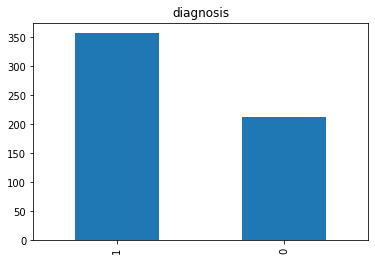

In [43]:
# Lets know how many values for malignant and for benign type of cancer
print("diagnosis        : \n",df["diagnosis"].value_counts())
print("\n")
print(df["diagnosis"].value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
df["diagnosis"].value_counts().plot.bar(title="diagnosis")


In [44]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

Number of duplicate rows :  (0, 31)


SUM : 
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64


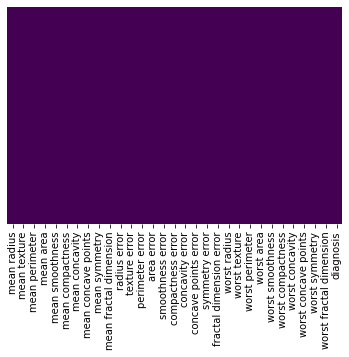

In [45]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# df["col"] = df["col"].fillna(df["col"].mean())
# df["col"] = df["col"].fillna(df["col"].interpolate())

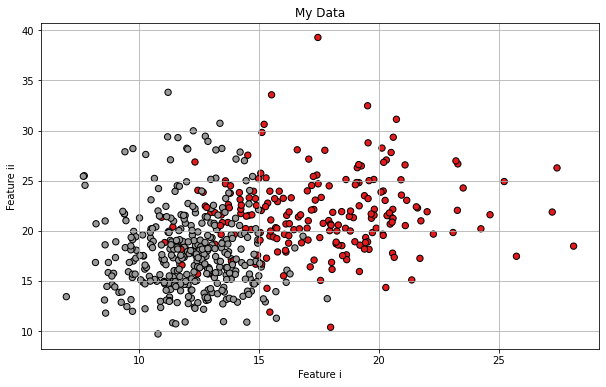

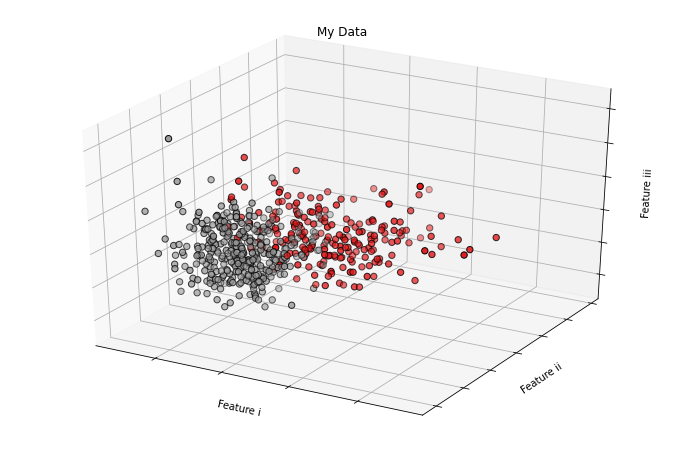

In [46]:
X = df.drop(["diagnosis"],axis=1).values
Y = df["diagnosis"].values

# 2D
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:, 0], X[:, 1], c=Y, marker="o", cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.set_ylabel("Feature ii")
ax.grid()
plt.show()

#-------------------------------------------------------------------------------
print("\n")
# 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 4], c=Y, marker="o", cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_title("My Data")
ax.set_xlabel("Feature i")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature ii")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Feature iii")
ax.w_zaxis.set_ticklabels([])
ax.grid()
plt.show()


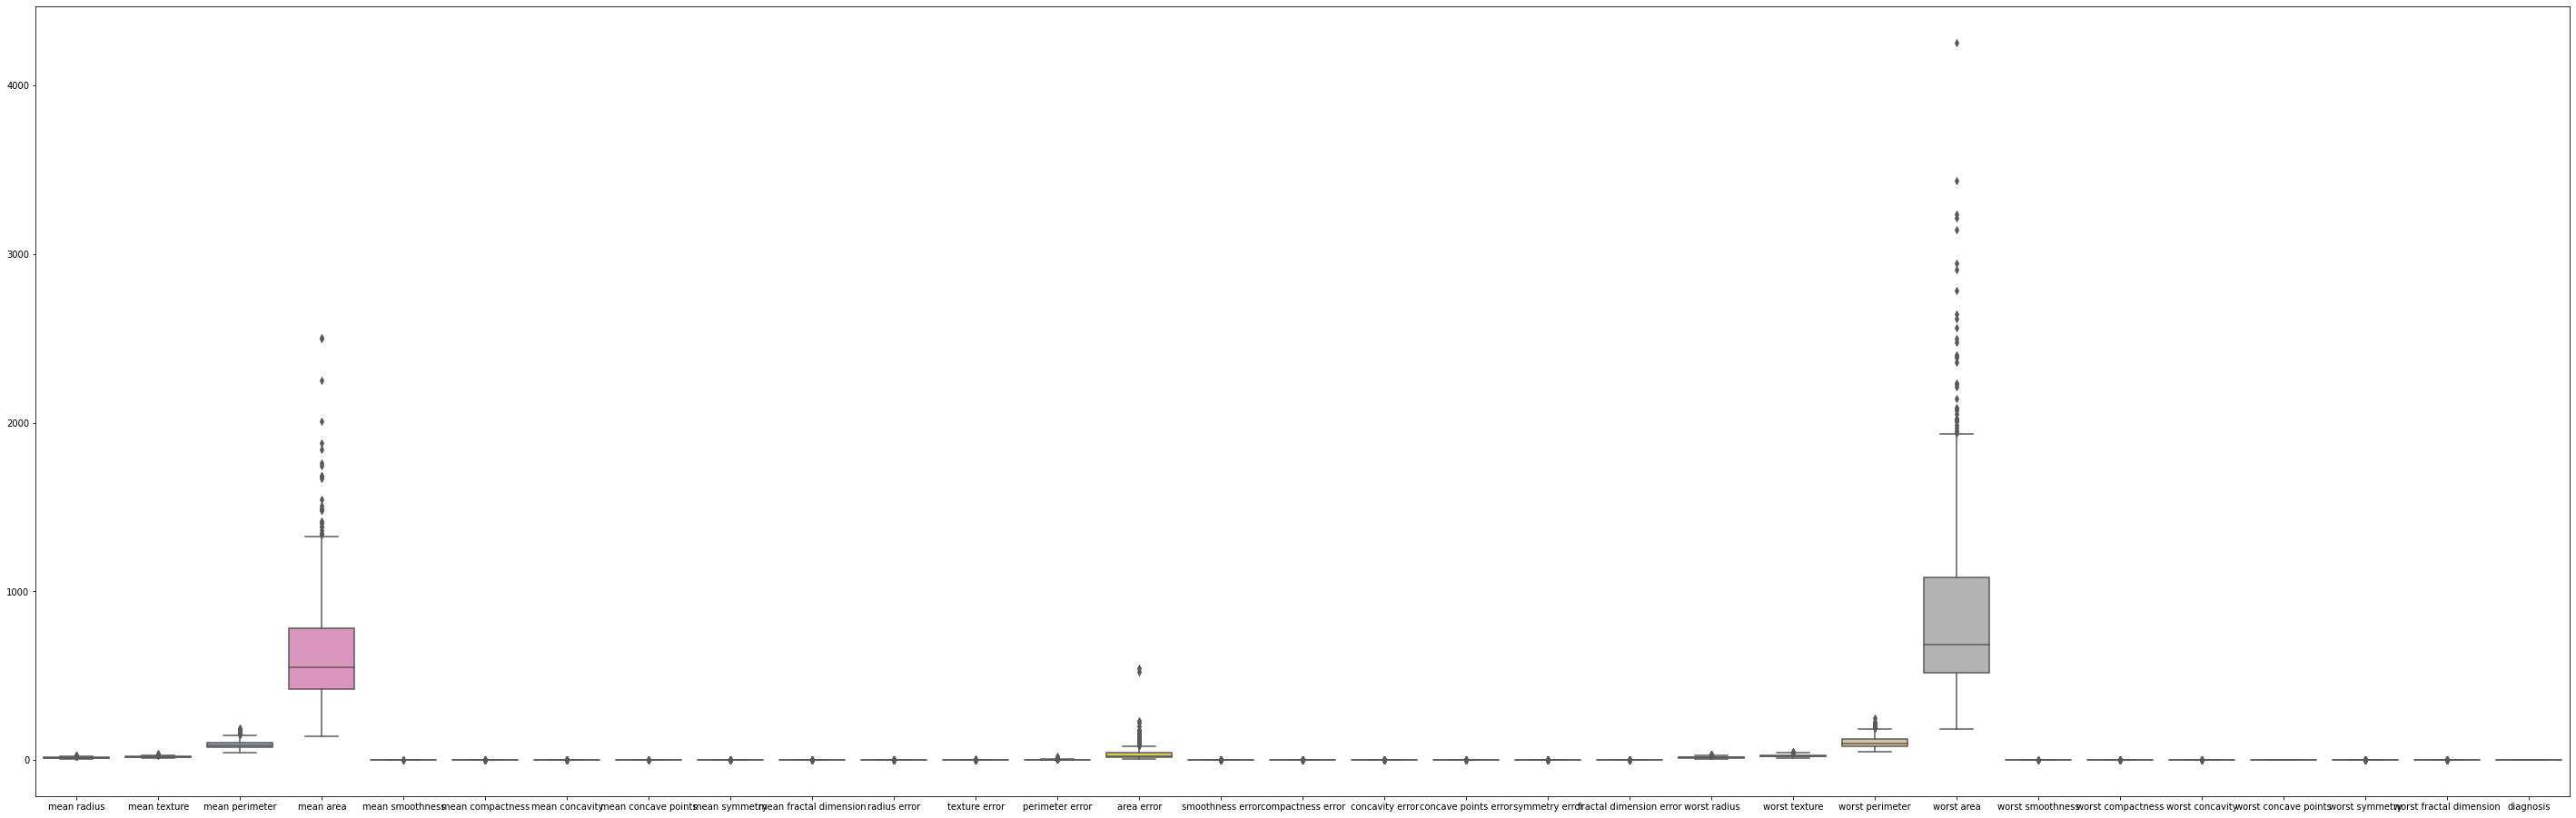

In [47]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()


lst_all_cols : 
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'diagnosis']


[dtype('int64'), dtype('float64')]
Numerical Data : 
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 's

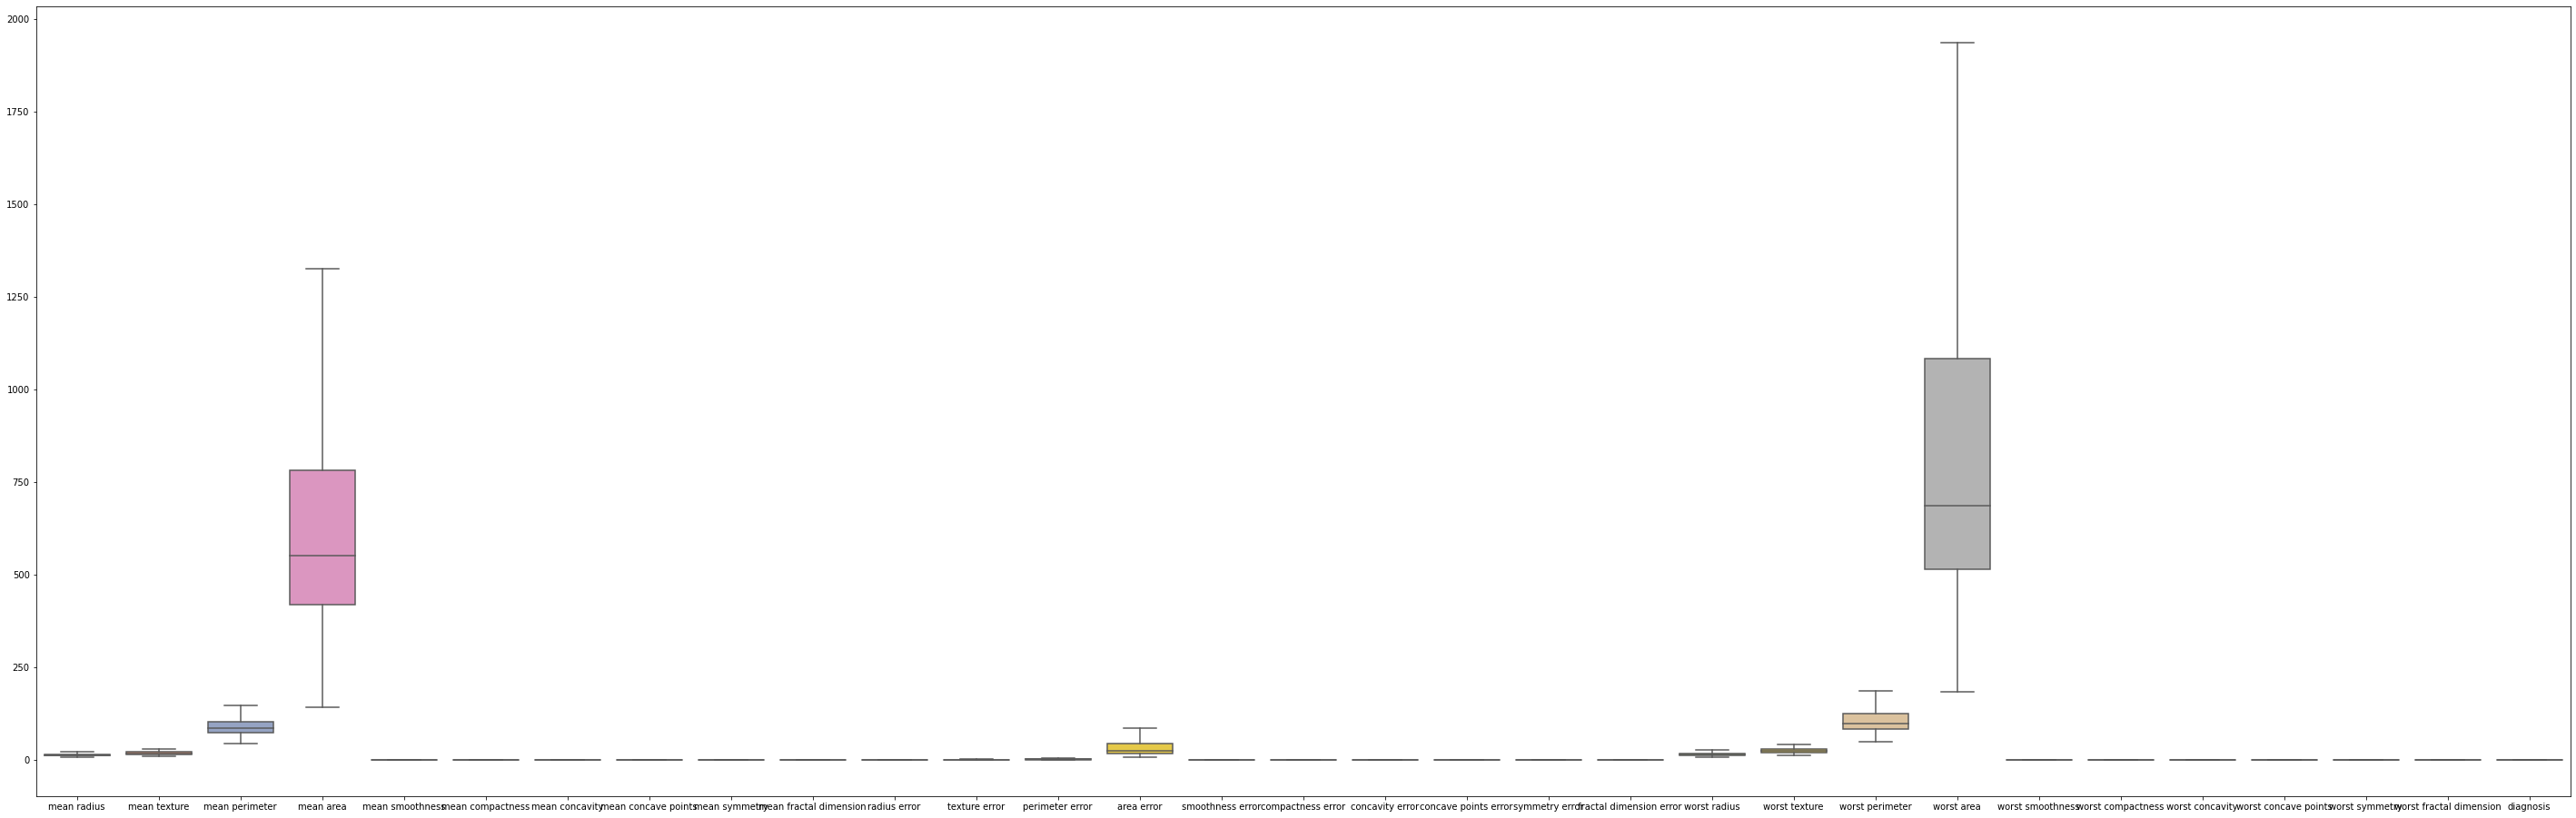

In [48]:
# Remove Outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)

print("-----------------------------------------------------------------------")
indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) 
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-------------------------------------------------------------------")

fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()


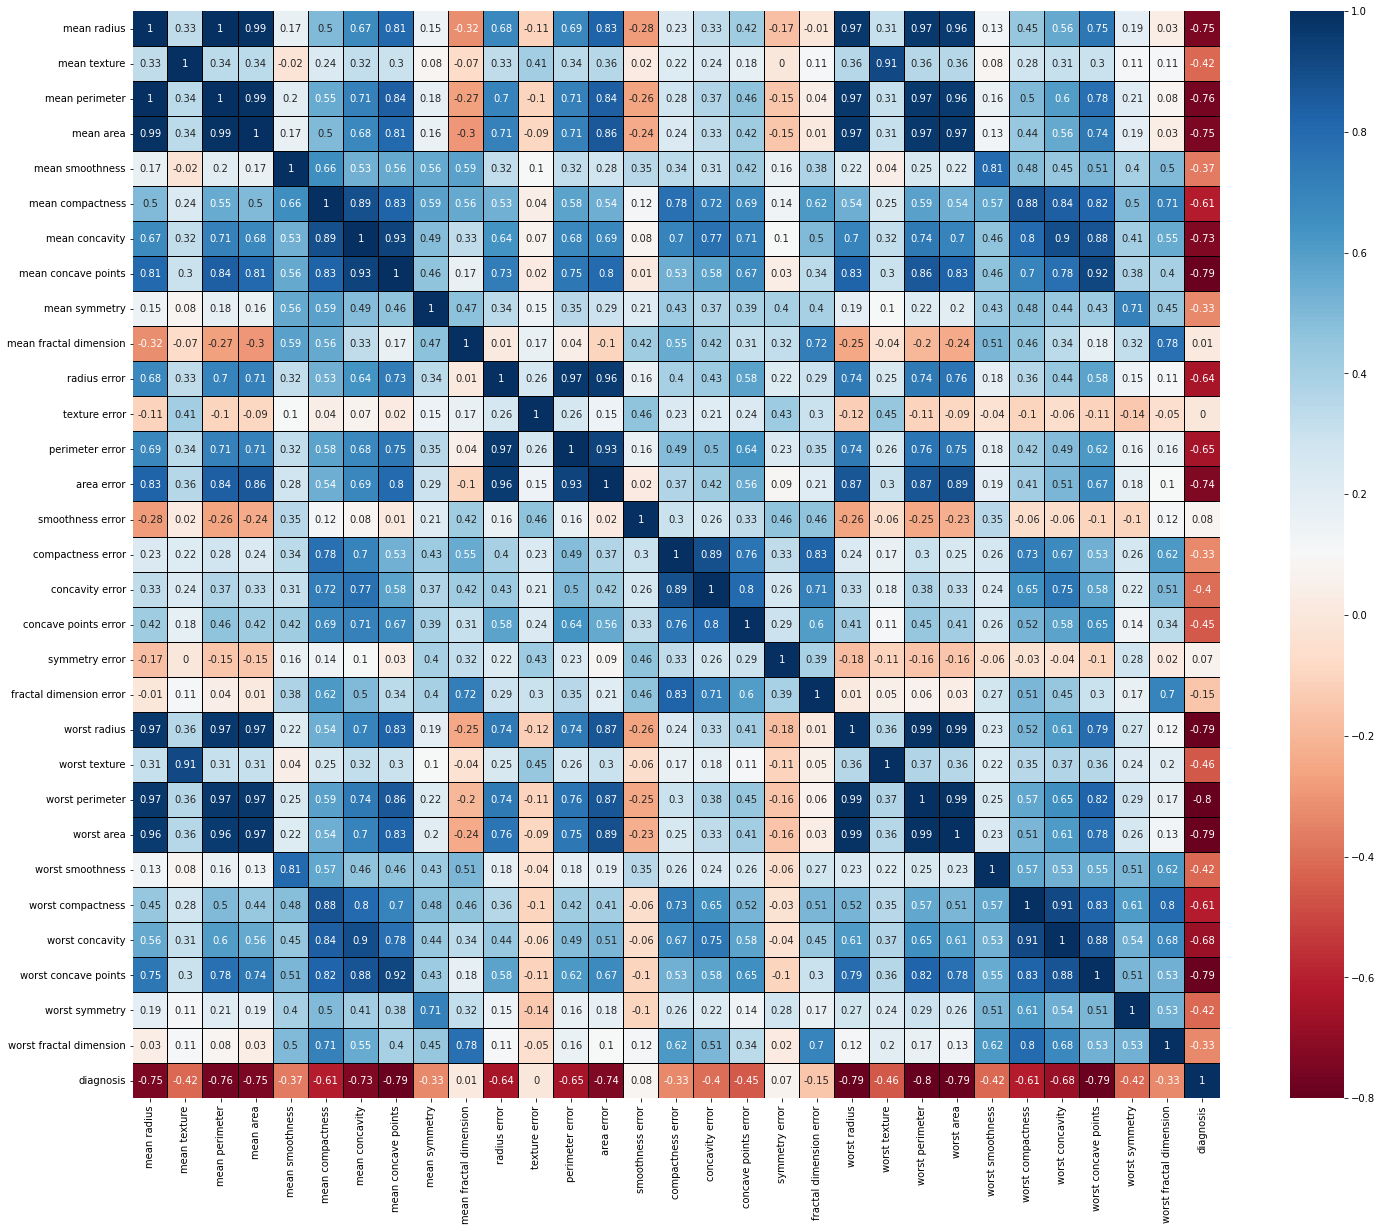

In [49]:
# Correlation matrix 
corrMatrix = df.corr()

# Plot corrMatrix
fig, ax = plt.subplots(figsize=(25,20)) 
# "RdBu_r", "BrBG_r", & "PuOr_r" are other good diverging colormaps
# corrMatrix.style.format("{:.2f}").background_gradient(cmap="coolwarm", axis=None)

sns.heatmap(corrMatrix.round(2), annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


In [50]:
# Correlation with output variable
cor_target = abs(corrMatrix["diagnosis"])

# Selecting highly correlated features : 0.5
relevant_features = cor_target[cor_target>0.5]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_relevant_features_columns = relevant_features.index.to_list()
my_data = pd.DataFrame(df, columns= lst_relevant_features_columns)

print("List the column names : ",my_data.columns.to_list())
my_data.sample(10).style.format("{:.2f}").background_gradient(cmap="RdYlGn")


relevant_features :  (16,) 
 mean radius             0.745217
mean perimeter          0.759006
mean area               0.752786
mean compactness        0.608494
mean concavity          0.727168
mean concave points     0.788099
radius error            0.642399
perimeter error         0.646875
area error              0.739068
worst radius            0.793938
worst perimeter         0.800618
worst area              0.794640
worst compactness       0.611083
worst concavity         0.683565
worst concave points    0.793566
diagnosis               1.000000
Name: diagnosis, dtype: float64
-----------------------------------------------------------------------
List the column names :  ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'diagnosis']


,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,diagnosis
365,20.44,133.80,1293.00,0.11,0.10,0.08,0.58,4.22,72.44,24.31,161.20,1780.00,0.24,0.27,0.18,0.00
143,12.90,83.74,512.20,0.10,0.05,0.03,0.21,1.69,16.64,14.48,97.17,643.80,0.25,0.21,0.10,1.00
272,21.75,147.30,1326.30,0.20,0.22,0.11,0.85,5.98,86.20,27.46,187.34,1937.05,0.47,0.58,0.18,0.00
312,12.76,82.29,504.10,0.08,0.04,0.03,0.33,2.35,25.18,14.19,92.04,618.80,0.22,0.18,0.08,1.00
543,13.21,84.88,538.40,0.07,0.03,0.03,0.24,1.54,17.85,14.37,92.48,629.60,0.14,0.11,0.08,1.00
369,21.90,147.20,1326.30,0.20,0.24,0.15,0.85,5.98,86.20,27.46,187.34,1937.05,0.39,0.48,0.24,0.00
186,18.31,118.60,1041.00,0.08,0.08,0.06,0.26,1.82,28.92,21.31,139.20,1410.00,0.24,0.35,0.16,0.00
108,21.90,147.49,1326.30,0.23,0.28,0.15,0.85,5.98,86.20,27.46,187.34,1937.05,0.63,0.79,0.29,0.00
83,19.10,129.10,1132.00,0.18,0.19,0.15,0.52,5.80,67.10,20.33,141.30,1298.00,0.28,0.24,0.18,0.00
227,15.00,97.45,684.50,0.11,0.07,0.04,0.23,2.28,19.88,16.41,114.20,808.20,0.36,0.34,0.14,1.00


In [51]:
# Define X variables and our target(y)
X = my_data.drop(["diagnosis"],axis=1).values
y = my_data["diagnosis"].values
print("X : ",X.shape," y : ",y.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
my_scaler.fit(X)
X_scaler = my_scaler.transform(X)

# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, 
                       y, test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)


X :  (569, 15)  y :  (569,)
X_train =  (455, 15)  y_train =  (455,)
X_test  =  (114, 15)  y_test  =  (114,)


In [ ]:
"""
# Creating the model using the Sequential API
my_model = keras.models.Sequential()
my_model.add(keras.layers.Dense( , activation="relu", input_shape = X_train.shape[1:]))
my_model.add()
.
.

# The model’s summary() method displays all the model’s layers
print(my_model.summary())
"""

In [ ]:
"""
# Compiling the model
my_model.compile()

# Training the model 
history = my_model.fit()
"""

In [ ]:
# Plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = my_model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


In [ ]:
# Confusion Matrix
y_pred = (my_model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")


# Make predictions
# predicted = my_model.predict(X_new)

# Save the model
# my_model.save("/content/my_model.h5")
